In [35]:
import numpy as np
import pandas as pd

In [36]:
dataset = pd.read_csv("cleaned_data.csv")

In [37]:
matrixOfFeatures_x = dataset.iloc[:, :-1].values
dependentVector_y = dataset.iloc[:, -1].values

In [38]:
print(matrixOfFeatures_x)

[['male' 22.0]
 ['female' 38.0]
 ['female' 26.0]
 ...
 ['female' nan]
 ['male' 26.0]
 ['male' 32.0]]


In [39]:
print(dependentVector_y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

In [40]:
dataset

,Sex,Age,Survived
0,male,22.0,0
1,female,38.0,1
2,female,26.0,1
3,female,35.0,1
4,male,35.0,0
...,...,...,...
886,male,27.0,0
887,female,19.0,1
888,female,NaN,0
889,male,26.0,1


In [41]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(matrixOfFeatures_x[:, 1:2])
matrixOfFeatures_x[:, 1:2] = imputer.transform(matrixOfFeatures_x[:, 1:2])

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [0])], remainder= "passthrough")
matrixOfFeatures_x = np.array(ct.fit_transform(matrixOfFeatures_x))

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
matrixOfFeatures_x = scaler.fit_transform(matrixOfFeatures_x)

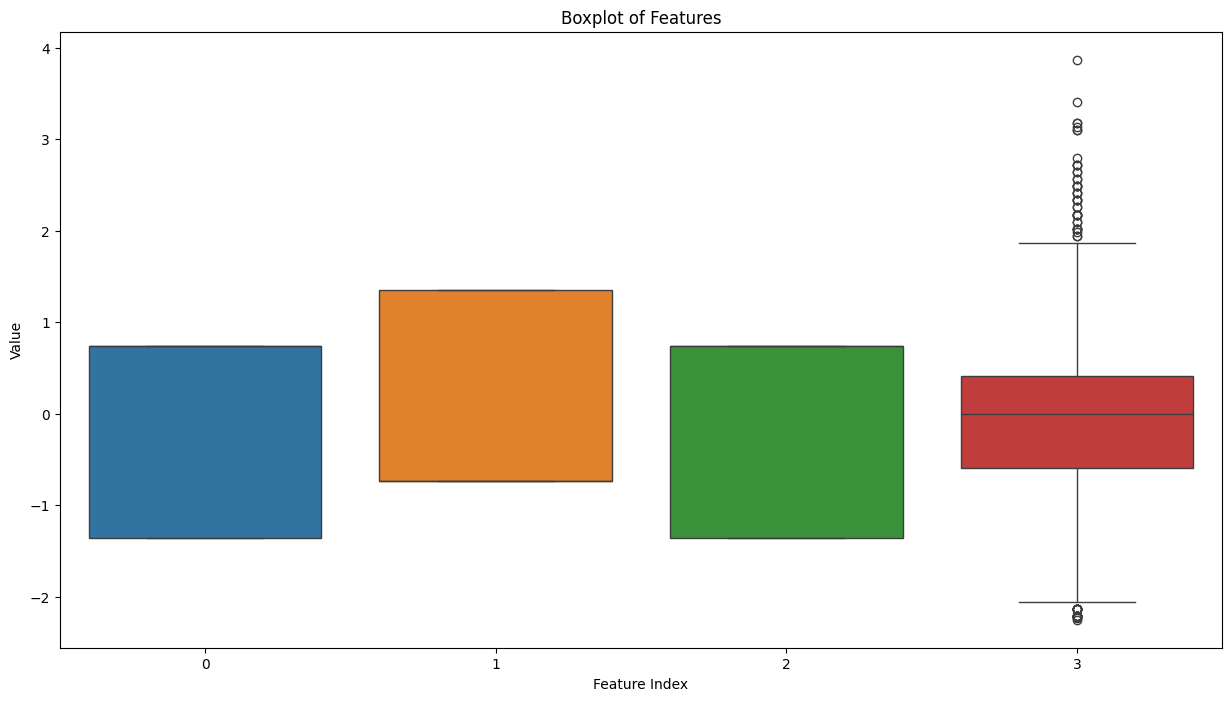

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

X_df = pd.DataFrame(matrixOfFeatures_x)

plt.figure(figsize=(15, 8))
sns.boxplot(data=X_df)
plt.title("Boxplot of Features")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.show()

In [50]:
from scipy import stats

z_scores = np.abs(stats.zscore(X_df))
X_no_outliers = X_df[(z_scores < 3).all(axis=1)]


In [51]:
dependentVector_y = dependentVector_y[X_no_outliers.index]